# Automobile EDA

### This notebook accompanies a report made using the data and visualisations processed herein. Please view the report for full analysis and insights, this notebook should only be referred to alongside the report.

### You can find it here: https://github.com/willgosnold/automobile_eda/blob/main/automobile_eda.pdf

In [3]:
# Make imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

In [4]:
# Load data and view

pd.set_option('display.max_columns', 50)  # Allows us to view all the columns

autos_df = pd.read_csv("automobile.txt")
autos_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
# Check the dimensions of the data
autos_df.shape

(205, 26)

In [6]:
# View the current total memory usage of the dataset
autos_df.memory_usage(deep=True).sum()

216465

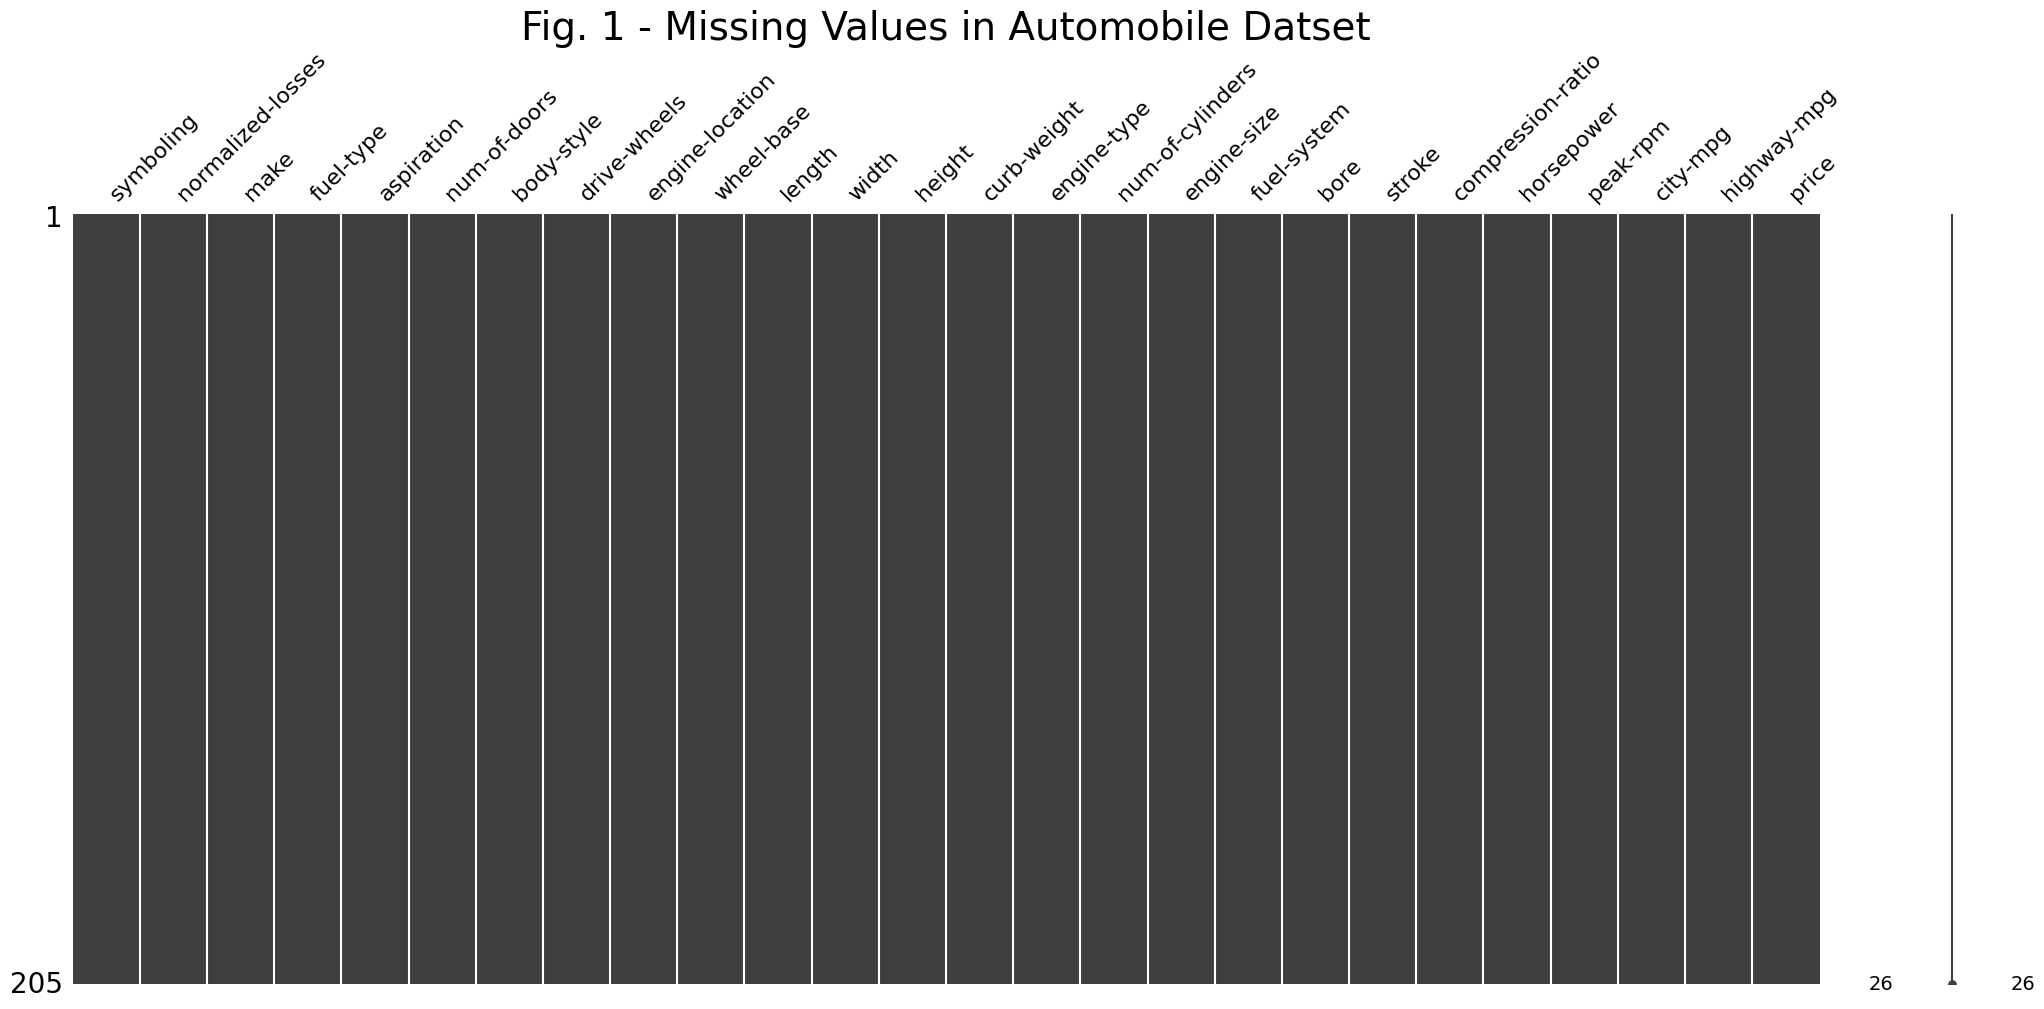

In [7]:
# Create missing data matrix to show any NaN values

missingno.matrix(autos_df)
plt.title("Fig. 1 - Missing Values in Automobile Datset", fontsize = 28)
plt.show()

In [8]:
# Confirm the graph showing there are none
autos_df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [9]:
# Check dtypes to see if numerical columns are numerical datatypes
autos_df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [10]:
# Noticed that there are ?s in the normalized-losses column
autos_df[autos_df["normalized-losses"] == "?"]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?
14,1,?,bmw,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3055,ohc,six,164,mpfi,3.31,3.19,9.0,121,4250,20,25,24565
15,0,?,bmw,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3230,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760
16,0,?,bmw,gas,std,two,sedan,rwd,front,103.5,193.8,67.9,53.7,3380,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315
17,0,?,bmw,gas,std,four,sedan,rwd,front,110.0,197.0,70.9,56.3,3505,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880


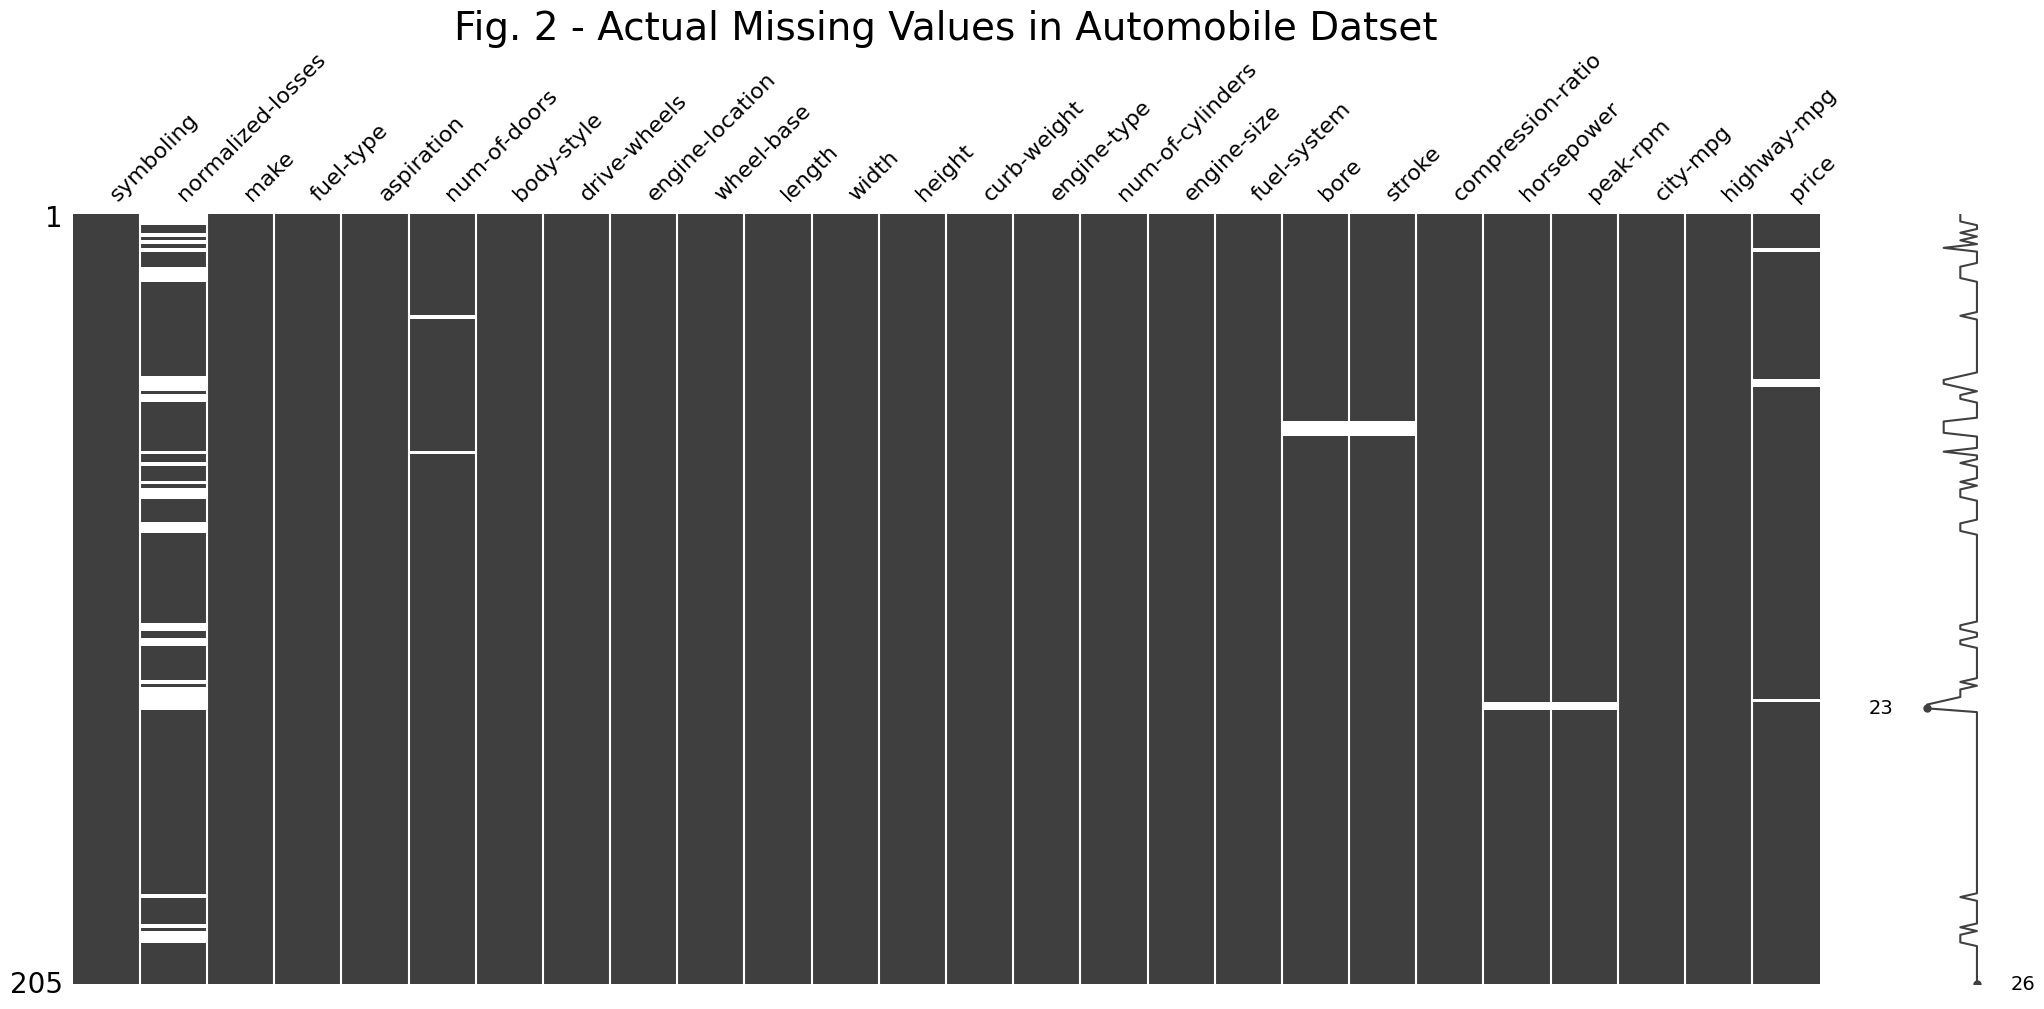

In [11]:
# Repeat the matrix but replacing ? with NaN

missingno.matrix(autos_df.replace("?", np.nan))
plt.title("Fig. 2 - Actual Missing Values in Automobile Datset", fontsize = 28)
plt.show()



In [12]:
# Confirming the total missing values per column

(autos_df
.replace("?", np.nan)
.isna()
.sum()
)

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [13]:
# Checking the numerical column datatypes now
numerical_cols = [
    "symboling",
    "normalized-losses",
    "wheel-base",
    "length",
    "width",
    "height",
    "curb-weight",
    "num-of-cylinders",
    "engine-size",
    "bore",
    "stroke",
    "compression-ratio",
    "horsepower",
    "peak-rpm",
    "city-mpg",
    "highway-mpg",
    "price",
]

(autos_df
[numerical_cols]
.dtypes
)


symboling              int64
normalized-losses     object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
num-of-cylinders      object
engine-size            int64
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

There are still some object columns in there at the moment so we will have to sort them out when we clean the data properly.

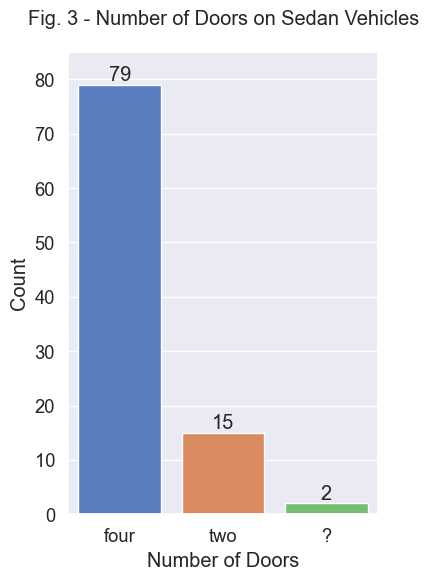

In [14]:
# View countplot of num-of-doors column to help decide what to do with the missing values

sns.set_theme(context="notebook", style="darkgrid", palette="muted", font_scale=1.2)

plt.figure(figsize=(4, 6))

ax = sns.countplot(
    data=autos_df[autos_df["body-style"] == "sedan"], 
    x="num-of-doors",
    )

ax.bar_label(ax.containers[0])
ax.set_xlabel("Number of Doors")
ax.set_ylabel("Count")
ax.set(ylim=(0, 85))

plt.title("Fig. 3 - Number of Doors on Sedan Vehicles", pad=20)
plt.show()

In [15]:
# Check the values in the num-of-cylinders column
(autos_df
["num-of-cylinders"]
.unique()
)

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [16]:
# helper function to impute means of columns so we don't 
# type it multiple times
def _fill_mean(df_, column):
    """Converts a given column to float, fills with mean values.

    Parameters
    ----------
    df_ : DataFrame
        Current state of a df within a chain operation
    column : str
        Name of the column to fill

    Returns
    -------
    Series
        Returns an updated set of values for the given column
    """
    
    return (df_[column]
            .astype("float64")
            .fillna(df_[column]
            .astype("float64")
            .mean()))

In [17]:
# Put the cleaning data function together, using pandas best 
# practices of chaining operations so we don't create a lot 
# of unnecessary global variables.

def car_wash(df):
    """Cleans the automobile dataset

    Parameters
    ----------
    df : DataFrame
        The raw loaded automobile.txt data
    
    Returns
    -------
    DataFrame
        A cleaned and processed version of the data for analysis.
    """

    # Drop the symboling and normalized-losses columns
    cols = autos_df.columns[2:]

    # Define a dictionary to map written numbers to integers
    numbers = {
        "two": 2,
        "three": 3,
        "four": 4,
        "five": 5,
        "six": 6,
        "eight": 8,
        "twelve": 12,
    }

    # Define a dictionary to map column names to the appropriate datatype
    types = {
        "make" : "category",
        "fuel_type" : "category",
        "aspiration" : "category",
        "num_of_doors" : "category",
        "body_style": "category",
        "drive_wheels": "category",
        "engine_location": "category",
        "curb_weight" : "int16",
        "engine_type" : "category",
        "num_of_cylinders" : "int8",
        "engine_size" : "int16",
        "fuel_system" : "category",
        "horsepower" : "int16",
        "peak_rpm" : "int16",
        "city_mpg" : "int8",
        "highway_mpg" : "int8",
        "price": "int32",
    }

    cleaned = (autos_df
    [cols]
    # Replace all ? with NaN
    .replace("?", np.nan)
    # Replace all hyphens in column names with underscores
    .rename(columns=lambda x: x.replace("-", "_"))
    # Drop missing values from the dependent variable
    .dropna(subset="price")

    # Tidy up the columns
    .assign(
        # Map num_of_cylinders and num_of_doors to the numbers dictionary
        num_of_cylinders=lambda df_: df_.num_of_cylinders.map(numbers),
        num_of_doors=lambda df_: df_.num_of_doors.map(numbers).fillna(4).astype("int8"),  # Fill empty values with 4 (mode for sedans)

        # Use mean imputation from the helper function to fill missing values
        bore = lambda df_: _fill_mean(df_, "bore"),
        stroke = lambda df_: _fill_mean(df_, "stroke"),
        horsepower = lambda df_: _fill_mean(df_, "horsepower"),
        peak_rpm = lambda df_: _fill_mean(df_, "peak_rpm"),

        # Change mfi to mpfi in fuel_system as it is synonymous
        fuel_system = lambda df_: df_.fuel_system.where(df_.fuel_system != "mfi", "mpfi")
    )
    # Convert all columns to the types as defined in the types dict
    .astype(types)
    )

    return cleaned


In [18]:
# Perform the clean
df = car_wash(autos_df)

In [19]:
# View updated memory usage after cleaning
df.memory_usage(deep=True).sum()

22505

In [43]:
# Get feature range information for Feature table in report (view in a text editor)
# for column in df.columns:
#     try:
#         print(df[column].name)
#         print(df[column].min())
#         print(df[column].max())
#     except TypeError:
#         print(df[column].value_counts())

I'm going to be looking at how different variables in the dataset relate to the price. As such, lets have a look and see which of the numerical variables show any correlation to price on this one dimensional heatmap below.

In [21]:
# Create the table for one dimensional correlation heatmap
df.corr(numeric_only=True)[["price"]]

,price
wheel_base,0.584642
length,0.690628
width,0.751265
height,0.135486
curb_weight,0.834415
num_of_cylinders,0.708645
engine_size,0.872335
bore,0.543154
stroke,0.082267
compression_ratio,0.071107


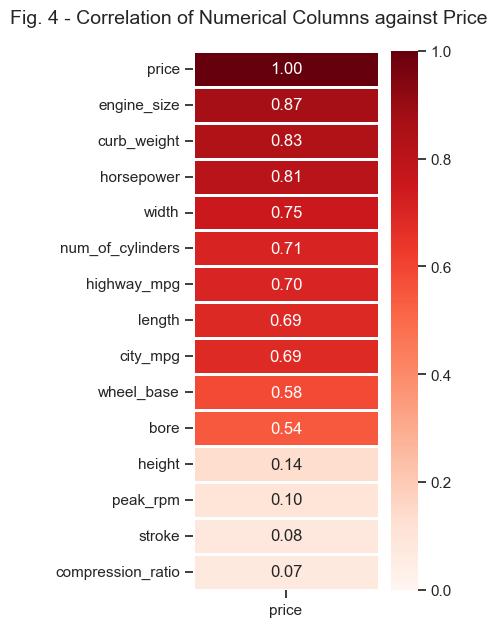

In [22]:
# Plot the table shown above using seaborn

sns.set_theme(context="notebook", style='ticks')

plt.figure(figsize=(3, 7))

sns.heatmap(
    data=(
        df.corr(numeric_only=True)[["price"]]
        .abs()  # Show absolute correlation rather than positive or negative
        .sort_values(by="price", ascending=False)
    ),
    cmap="Reds",
    annot=True,
    vmin=0,
    linewidth=1,
    fmt=".2f",
)

plt.title("Fig. 4 - Correlation of Numerical Columns against Price", pad=20, x=0.3, fontsize=14)
plt.show()

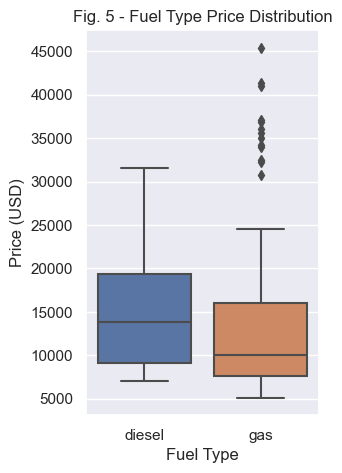

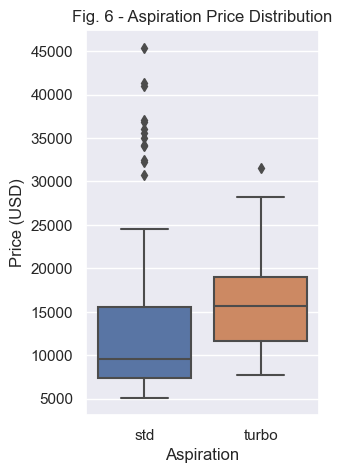

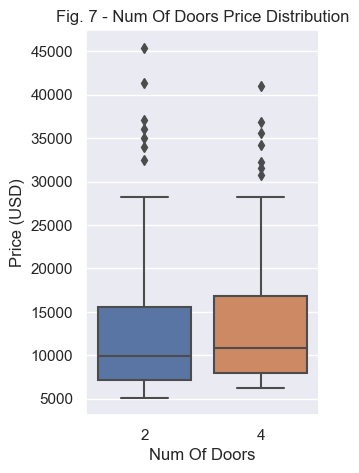

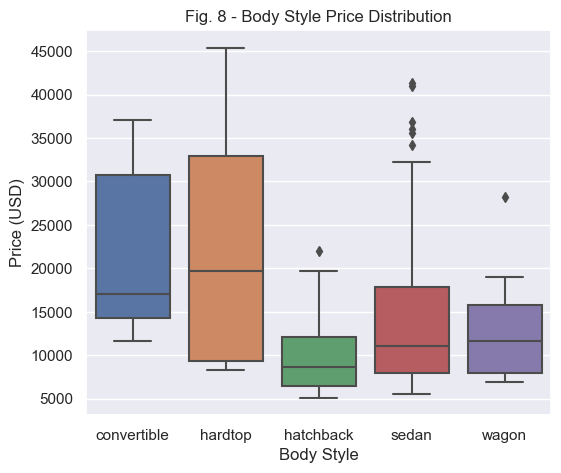

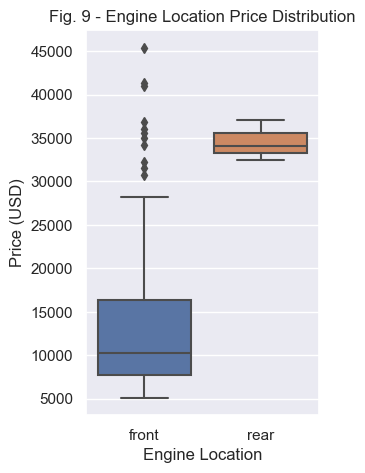

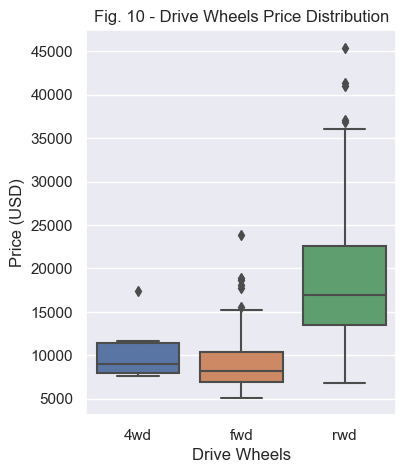

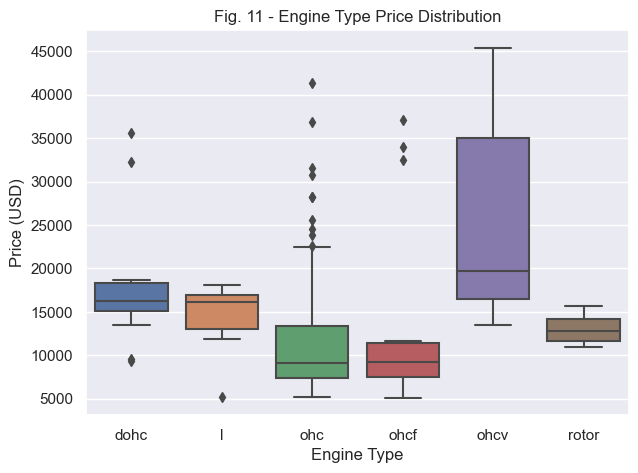

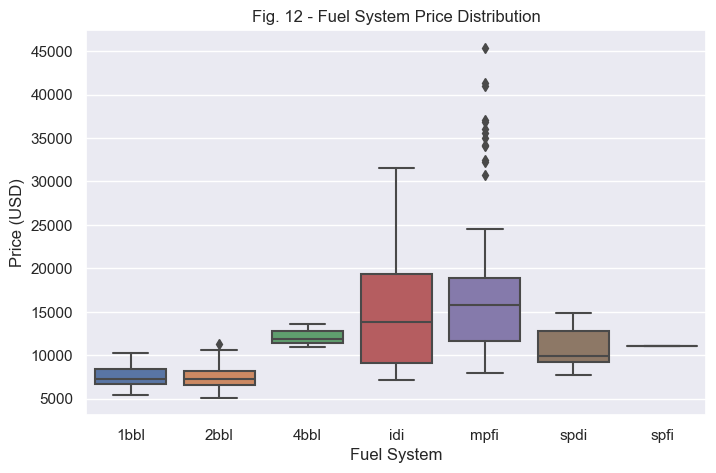

In [23]:
# Define categorical variables
categoricals = [
    "fuel_type",
    "aspiration",
    "num_of_doors",
    "body_style",
    "engine_location",
    "drive_wheels",
    "engine_type",
    "fuel_system",
]

sns.set_theme(context="notebook", style="darkgrid")

def make_boxes(categories, fig_start_num):
    """Produces boxplots for every column in a list of categories.

    Parameters
    ----------
    categories : list
        A list of strings containing the column names of the data to plot.
    fig_start_num : int
        The "Fig." number of the first plot.
    
    Returns
    -------
    None
    """
    
    i = fig_start_num
    for column in categories:
        plt.figure(figsize=(len(df[column].unique()) + 1, 5))

        ax = sns.boxplot(x=column, y="price", data=df)
        label = column.replace("_", " ").title()
        ax.set_title(f"Fig. {i} - {label} Price Distribution")
        ax.set_ylabel("Price (USD)")
        ax.set_xlabel(label)

        plt.show()

        i += 1


make_boxes(categoricals, fig_start_num=5)


In [24]:
# Confirm engine location disparity
df.engine_location.value_counts()

front    198
rear       3
Name: engine_location, dtype: int64

In [25]:
# Check drive wheels as well
df.drive_wheels.value_counts()

fwd    118
rwd     75
4wd      8
Name: drive_wheels, dtype: int64

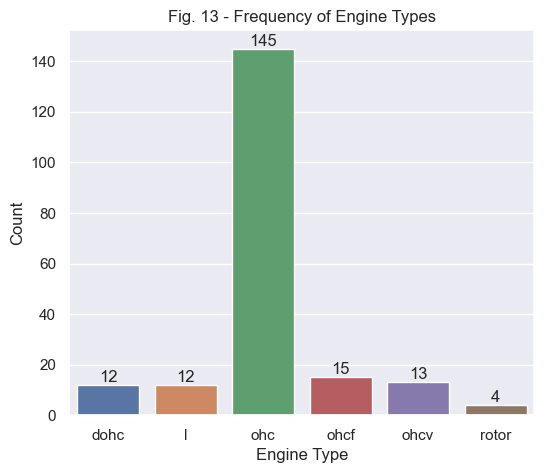

In [26]:
# Create engine type countplot
plt.figure(figsize=(6,5))

ax = sns.countplot(data=df, x="engine_type")

ax.bar_label(ax.containers[0])
ax.set_title("Fig. 13 - Frequency of Engine Types")
ax.set_xlabel("Engine Type")
ax.set_ylabel("Count")

plt.show()

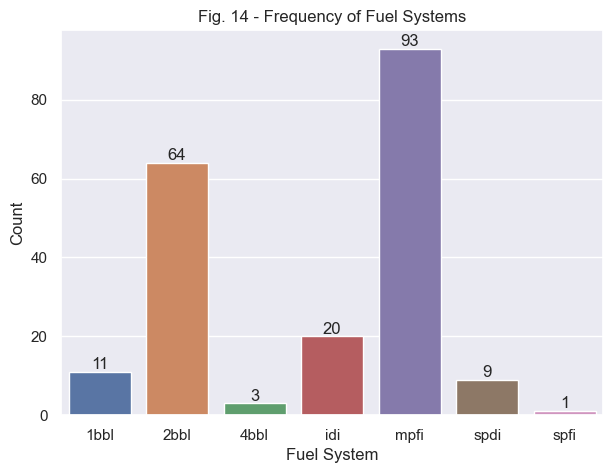

In [27]:
# Create fuel system countplot
plt.figure(figsize=(7,5))

ax = sns.countplot(data=df, x="fuel_system")

ax.bar_label(ax.containers[0])
ax.set_title("Fig. 14 - Frequency of Fuel Systems")
ax.set_xlabel("Fuel System")
ax.set_ylabel("Count")

plt.show()

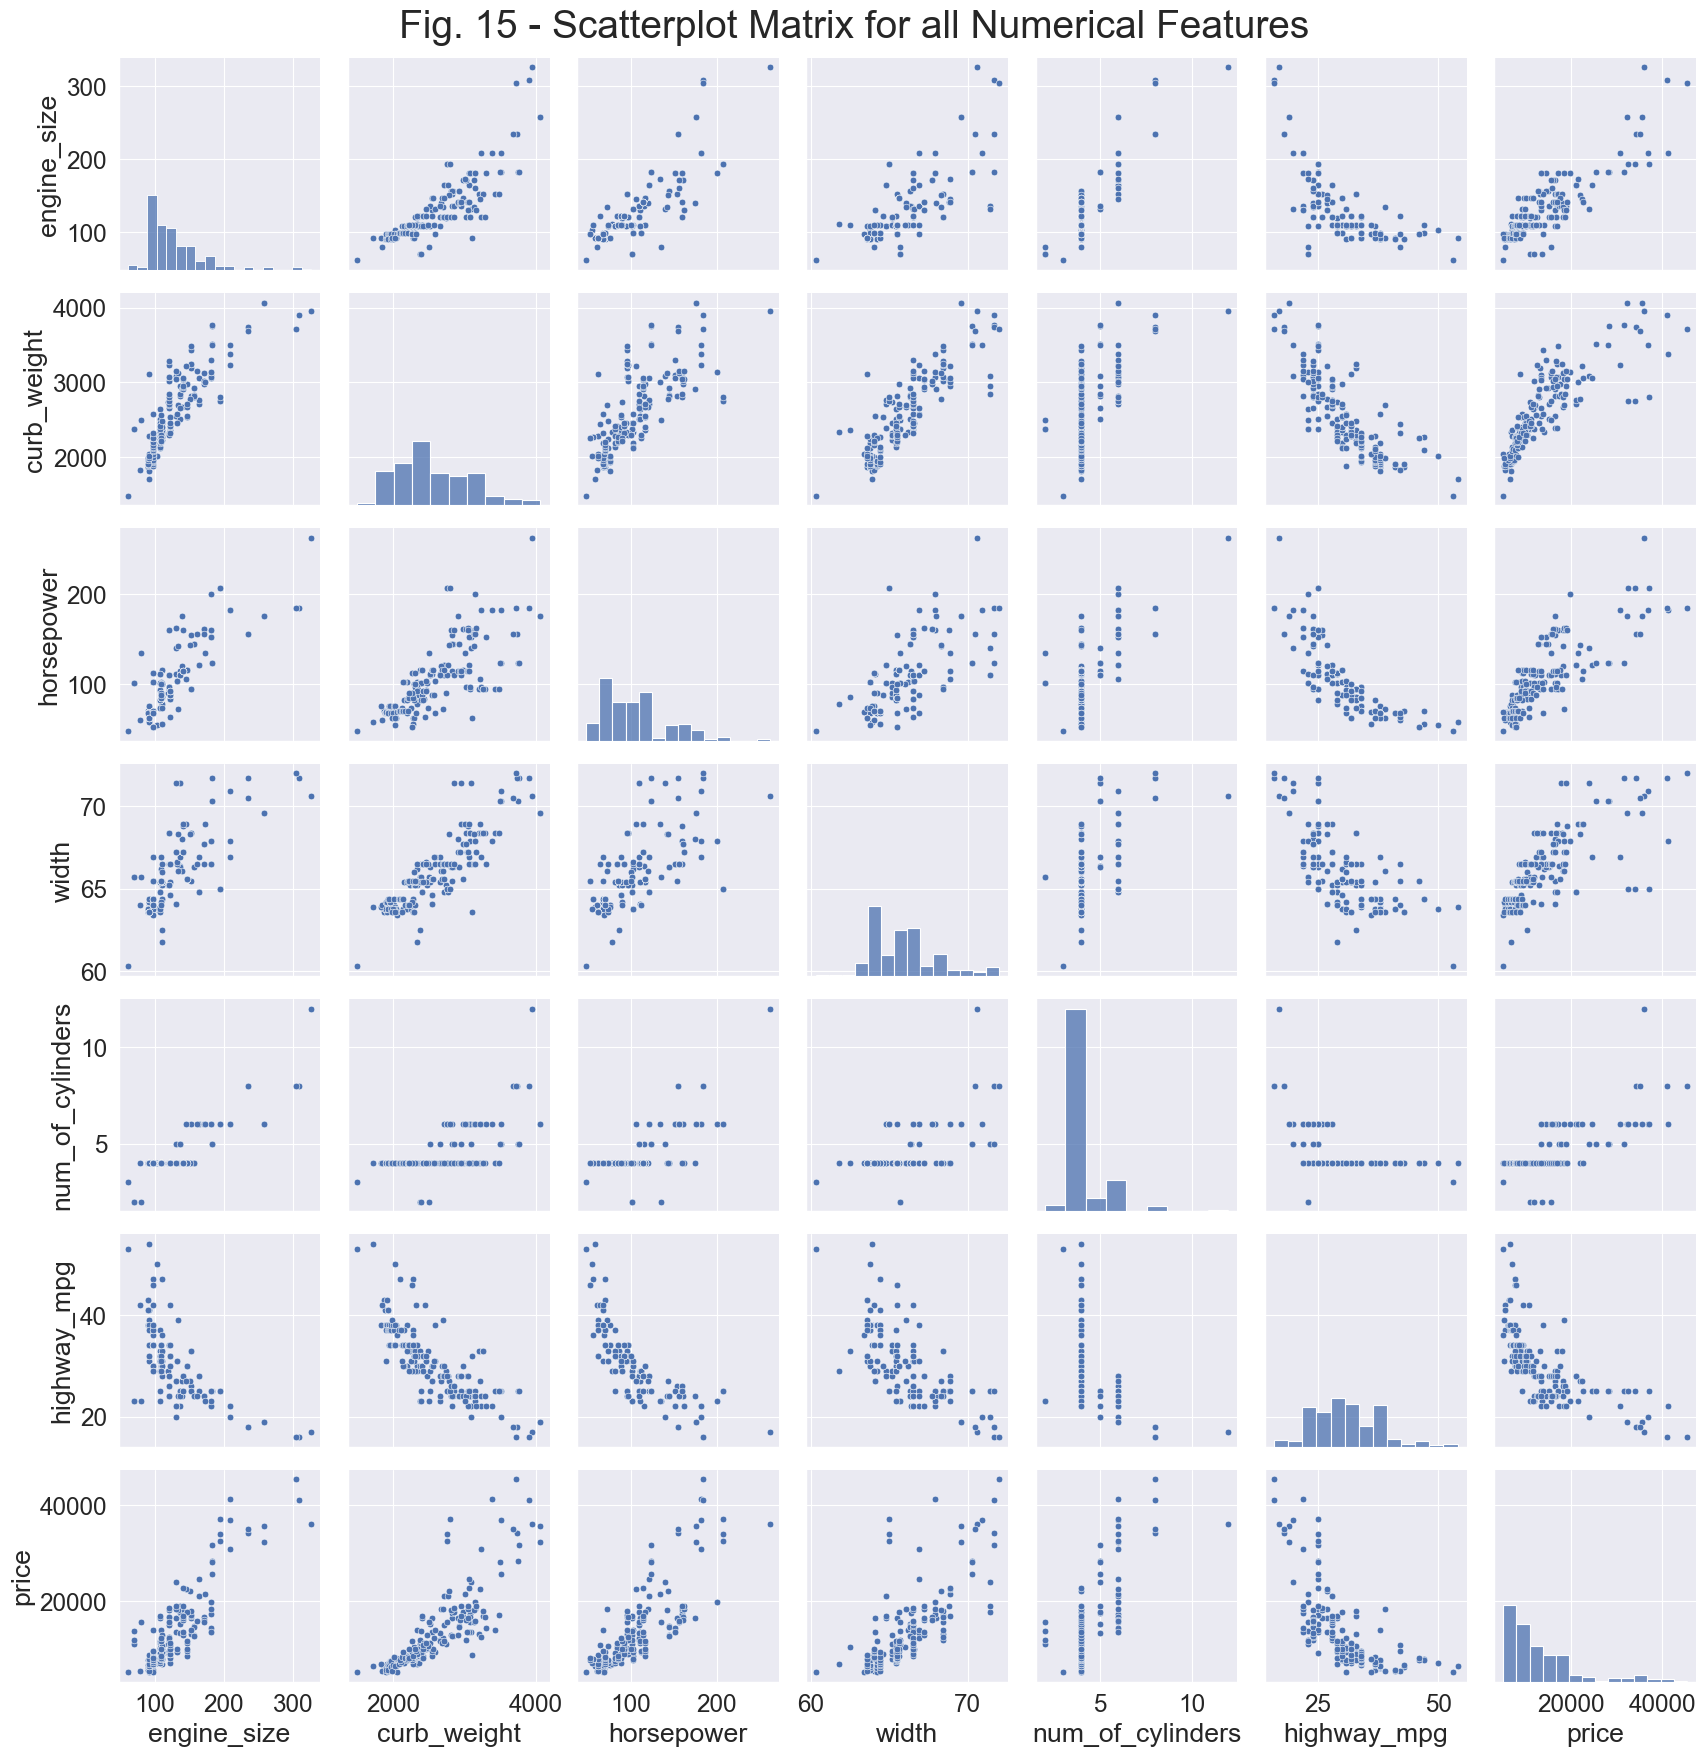

In [28]:
# Define relevant columns for further analysis
cols = [
    "engine_size",
    "curb_weight",
    "horsepower",
    "width",
    "num_of_cylinders",
    "highway_mpg",
    "fuel_type",
    "aspiration",
    "body_style",
    "drive_wheels",
    "engine_type",
    "price",
]

# Create scatterplot matrix of all numeical variables
sns.set_context("paper", font_scale=2)

sns.pairplot(data=df[cols])

plt.suptitle("Fig. 15 - Scatterplot Matrix for all Numerical Features", y=1.01, fontsize=28)
plt.show()


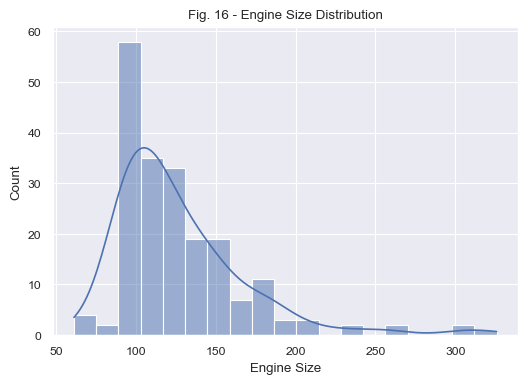

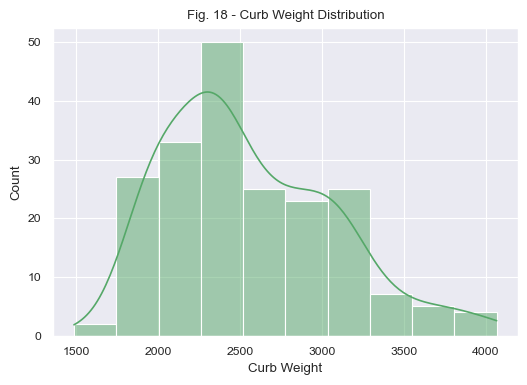

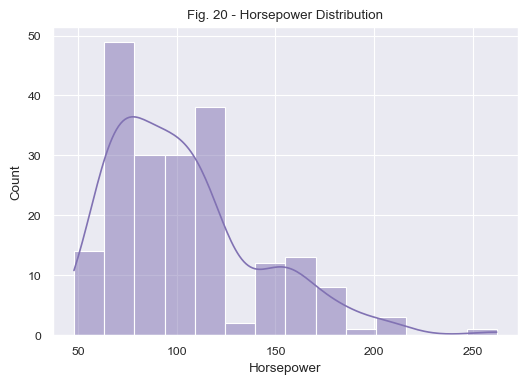

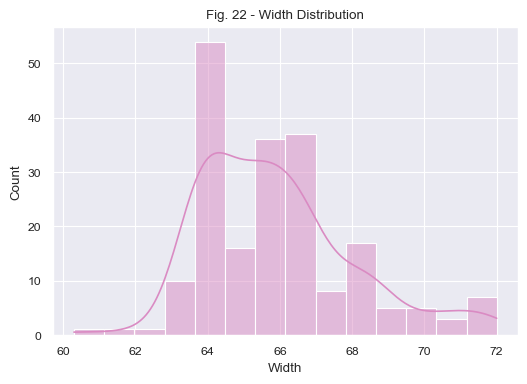

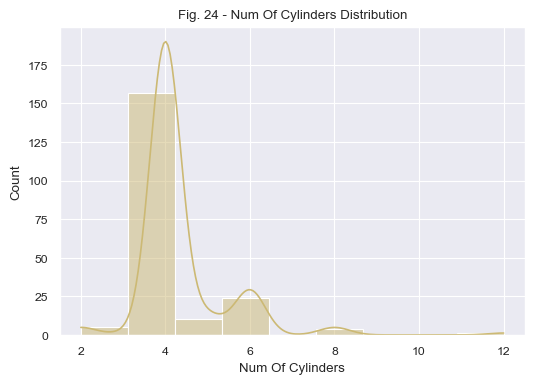

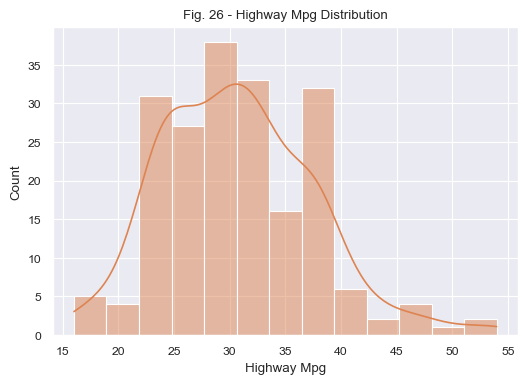

In [29]:
sns.set_context("paper", font_scale=1)

# Define numerical features
numericals = [
    "engine_size",
    "curb_weight",
    "horsepower",
    "width",
    "num_of_cylinders",
    "highway_mpg",
]

# Create distribution histplots for all numericals

def make_hists(categories, fig_start_num):
    """Creates a histplot for all columns in a given list of categories.

    Parameters
    ----------
    categories : list
        A list of strings containing the column names of the data to plot.
    fig_start_num : int
        The "Fig." number to start from.
    
    Returns
    -------
    None
    """

    i = fig_start_num
    for column in categories:
        plt.figure(figsize=(6, 4))

        label = column.replace("_", " ").title()

        ax = sns.histplot(
            data=df[column], 
            kde=True, 
            # Make each graph the next colour in the palette
            # % 9 prevents index error by looping back to start 
            # if there are too many values.
            color=sns.color_palette("deep")[(i-fig_start_num) % 9],  
        )

        # Label the graphs and show
        ax.set_title(f"Fig. {i} - {label} Distribution")
        ax.set_xlabel(f"{label}")
        plt.show()
        # i += 2 as I am going to make another graph for each in between
        i += 2

make_hists(numericals, fig_start_num=16)


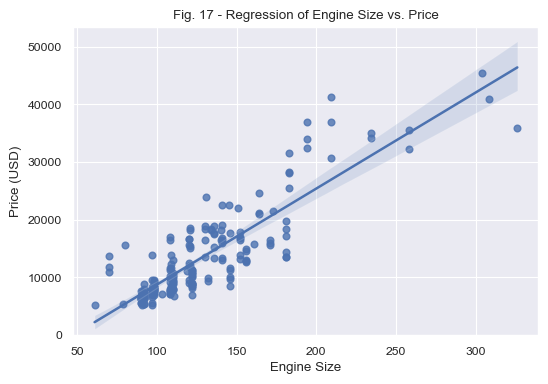

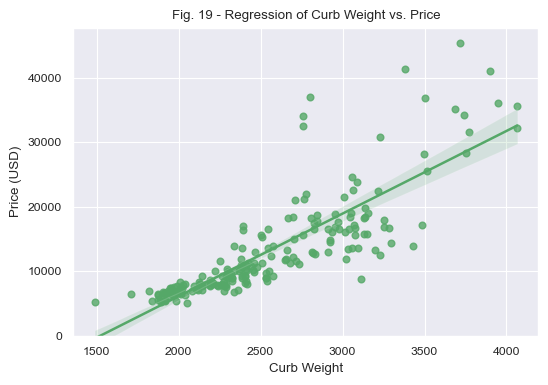

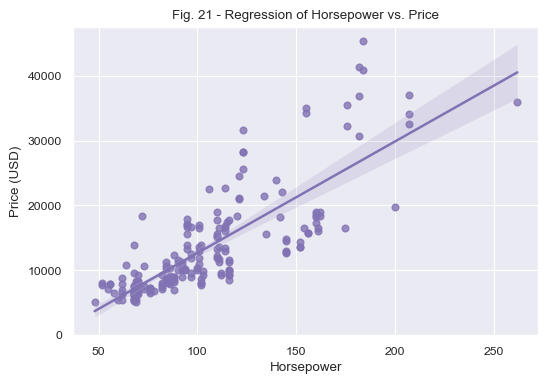

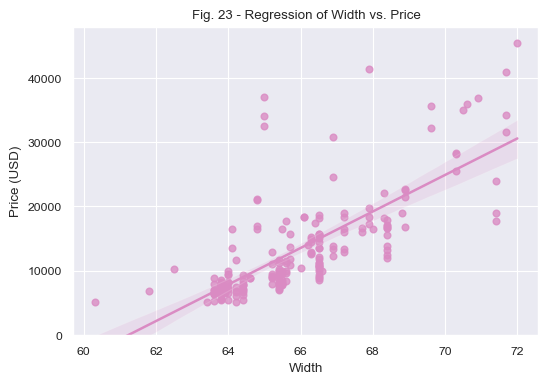

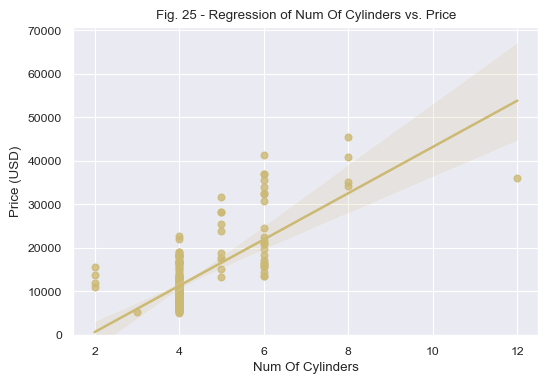

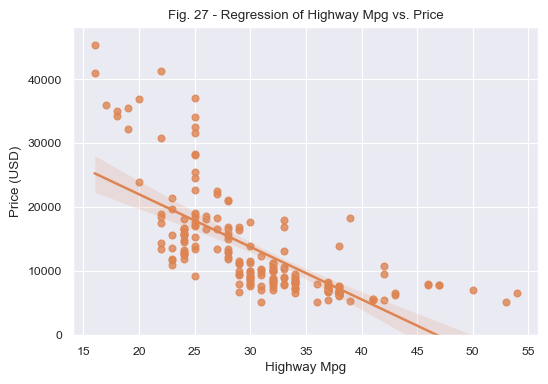

In [30]:
def make_regs(categories, fig_start_num):
    """Creates a regplot for all columns in a given list of categories.

    Parameters
    ----------
    categories : list
        A list of strings containing the column names of the data to plot.
    fig_start_num : int
        The "Fig." number to start from.
    
    Returns
    -------
    None
    """

    i = fig_start_num
    for column in categories:
        plt.figure(figsize=(6, 4))

        label = column.replace("_", " ").title()

        ax = sns.regplot(
            data=df,
            x=column,
            y="price",
            # Meake each a different colour as before
            color=sns.color_palette("deep")[(i-fig_start_num) % 9],
        )

        # Label the graphs and show
        ax.set_title(f"Fig. {i} - Regression of {label} vs. Price")
        ax.set_xlabel(f"{label}")
        ax.set_ylabel("Price (USD)")
        ax.set_ylim(0, None)
        plt.show()
        # i += 2 again to do alternating fig numbers
        i += 2

make_regs(numericals, fig_start_num=17)

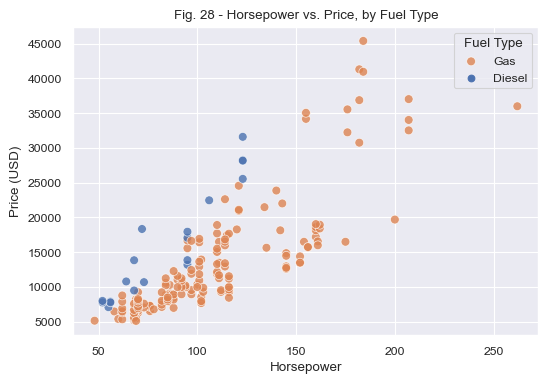

In [31]:
# Create horsepower v price scatter with fuel type as colour
plt.figure(figsize=(6, 4))

ax = sns.scatterplot(
    data=df, 
    x="horsepower", 
    y="price", 
    hue="fuel_type",
    s=40,
    alpha=0.8,
    )

# Label and show
ax.set_title("Fig. 28 - Horsepower vs. Price, by Fuel Type")
ax.set_xlabel("Horsepower")
ax.set_ylabel("Price (USD)")
ax.legend(title="Fuel Type", labels=["Gas", "Diesel"])
plt.show()

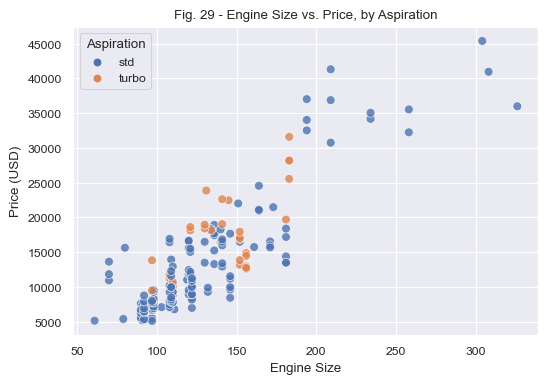

In [32]:
# Create engine size v price scatter with aspiration as colour
plt.figure(figsize=(6, 4))

ax = sns.scatterplot(
    data=df, 
    x="engine_size", 
    y="price", 
    hue="aspiration",
    s=40,
    alpha=0.8,
    )

# Lables and show
ax.set_title("Fig. 29 - Engine Size vs. Price, by Aspiration")
ax.set_xlabel("Engine Size")
ax.set_ylabel("Price (USD)")
ax.legend(title="Aspiration")
plt.show()

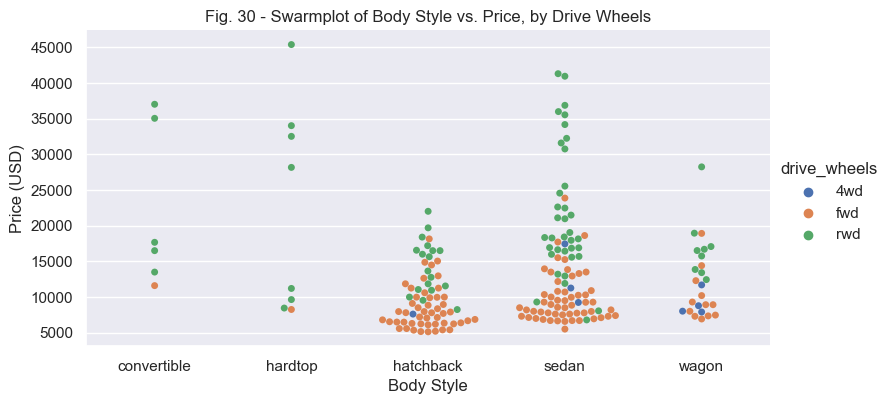

In [33]:
sns.set(font_scale=1)

# Create swarmplot of body style vs price with drive wheels as colour
sns.catplot(
    data=df,
    x="body_style",
    y="price",
    kind="swarm",
    hue="drive_wheels",
    height=4,
    aspect=2,
)

# Labels and show
plt.title("Fig. 30 - Swarmplot of Body Style vs. Price, by Drive Wheels")
plt.xlabel("Body Style")
plt.ylabel("Price (USD)")
plt.show()


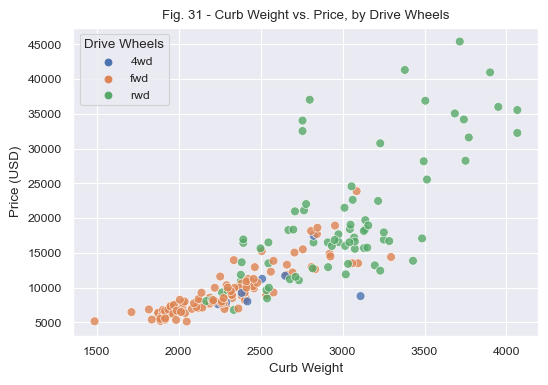

In [34]:
sns.set_context("paper", font_scale=1)

# Create scatter of curb weight v price with drive wheels as colour
plt.figure(figsize=(6, 4))

ax = sns.scatterplot(
    data=df, 
    x="curb_weight", 
    y="price", 
    hue="drive_wheels",
    s=40,
    alpha=0.8,
    )

ax.set_title("Fig. 31 - Curb Weight vs. Price, by Drive Wheels")
ax.set_xlabel("Curb Weight")
ax.set_ylabel("Price (USD)")
ax.legend(title="Drive Wheels")
plt.show()

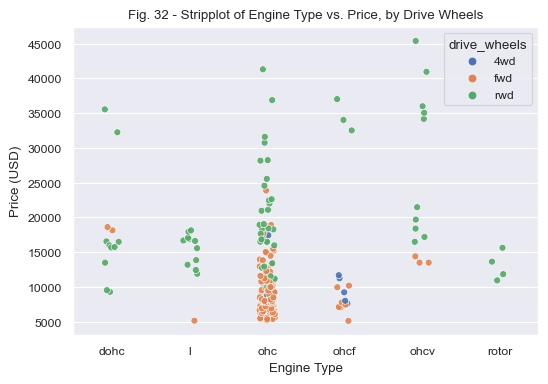

In [35]:
# Create strip plot of engine type v price with drive wheels as colour

plt.figure(figsize=(6,4))

ax = sns.stripplot(
    data=df, 
    x="engine_type", 
    y="price", 
    hue="drive_wheels", 
    alpha=0.9,
    edgecolor="white",
    linewidth=0.5,

)

# Labels and show
ax.set_title("Fig. 32 - Stripplot of Engine Type vs. Price, by Drive Wheels")
ax.set_xlabel("Engine Type")
ax.set_ylabel("Price (USD)")

plt.show()

In [36]:
# Get fuel means for conclusion insights
fuel_means = df.groupby("fuel_type")["price"].mean()
fuel_means

fuel_type
diesel    15838.15000
gas       12916.40884
Name: price, dtype: float64

In [37]:
# Calculate percentage difference between the values
(fuel_means[0] - fuel_means[1]) / fuel_means[1] * 100

22.620383083747168

In [38]:
# Do the same for aspiration
aspiration_means = df.groupby("aspiration")["price"].mean()
aspiration_means

aspiration
std      12542.181818
turbo    16254.805556
Name: price, dtype: float64

In [39]:
# And again get the mean
(aspiration_means[1] - aspiration_means[0]) / aspiration_means[0] * 100

29.601099642740934

In [40]:
# Get body_style median prices
df.groupby("body_style")["price"].median()

body_style
convertible    17084.5
hardtop        19687.5
hatchback       8672.0
sedan          11078.5
wagon          11694.0
Name: price, dtype: float64

In [41]:
# Get drive_wheels median prices
df.groupby("drive_wheels")["price"].median()

drive_wheels
4wd     9005.5
fwd     8192.0
rwd    16900.0
Name: price, dtype: float64

In [42]:
# Get engine_type median prices
df.groupby("engine_type")["price"].median()

engine_type
dohc     16249.0
l        16105.0
ohc       9095.0
ohcf      9233.0
ohcv     19699.0
rotor    12745.0
Name: price, dtype: float64

### Thank you very much for taking the time to read through this analysis, I hope you found it insightful.